### HR Attrition Prediction
#### The goal of this project is to be able to predict the liklihood of attrition, so an employer can use this information to emphasize attention towards a particular employee. 
#### The dataset was taken from Kaggle, but all ideas are my own

##### Dummy Attribute info

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [2]:
# read in data
dat = pd.read_csv("HR Employee Attrition.csv")
# data head 
dat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Explatory Data Analysis

In [3]:
print("Number of Columns: ", len(dat.columns))
print("Number of Rows: ", len(dat))
print("Number of Missing Values:\n", dat.isnull().sum())

Number of Columns:  35
Number of Rows:  1470
Number of Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             

##### We can see there are no missing values - yay!

<AxesSubplot:>

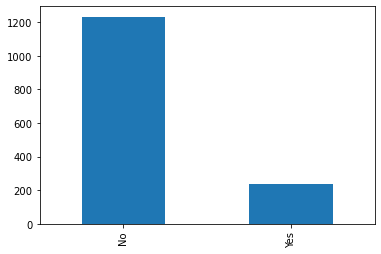

In [4]:
# exploring columns
# attrition
dat.Attrition.value_counts().plot.bar() 


##### Way more non attrition than attrition

### Age

In [5]:
# curious about age distribution
print(dat.Age.mean())
print(dat.Age.median())

36.923809523809524
36.0


##### Average age is about 37

In [6]:
# I want to see the distribution between Genders, Department, Job role, and Marital Status
# Genders
datAttritionYes = dat[dat["Attrition"] == "Yes"]
ratioWomenTotal = len(dat[dat["Gender"] == "Female"])/len(dat)
ratioWomenAttrition = len(datAttritionYes[datAttritionYes["Gender"] == "Female"])/len(datAttritionYes)
print(ratioWomenTotal)
print(ratioWomenAttrition)



0.4
0.3670886075949367


##### The ratio of women for total, and the ratio for attrition is similar - difference of 0.03 so I am going to conclude that gender is not an attribute that is contributing to attrition

### Department

<AxesSubplot:>

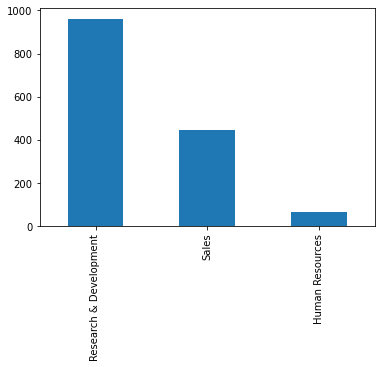

In [7]:
dat.Department.value_counts().plot.bar() 

<AxesSubplot:>

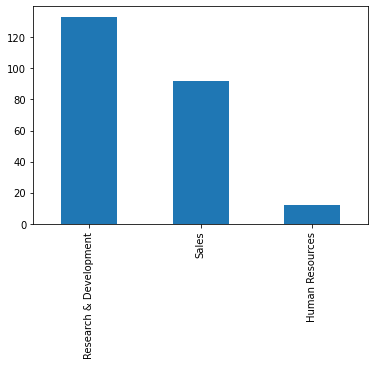

In [8]:
datAttritionYes.Department.value_counts().plot.bar() 

##### Seems like sales is increasing in attrition, so department could be a variable that contributes to attrition

### Job Role

<AxesSubplot:>

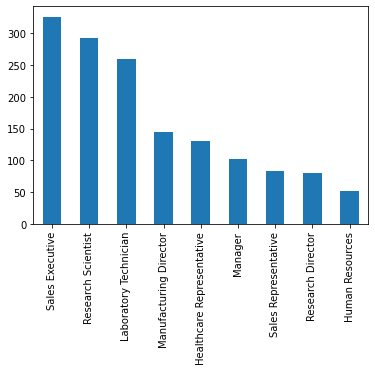

In [9]:
dat.JobRole.value_counts().plot.bar() 

<AxesSubplot:>

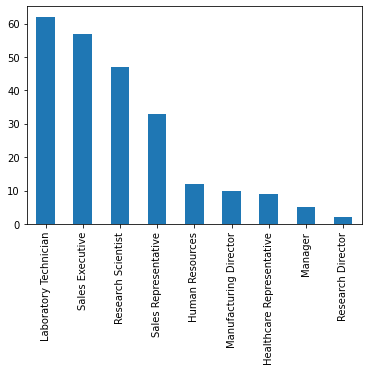

In [10]:
datAttritionYes.JobRole.value_counts().plot.bar()

##### The distribution of job role for total, and for attrition are not the same, so I think that job role is an attribute that contributes to attrition

### Marital Status

<AxesSubplot:>

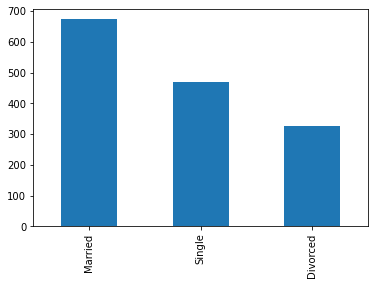

In [11]:
dat.MaritalStatus.value_counts().plot.bar() 

<AxesSubplot:>

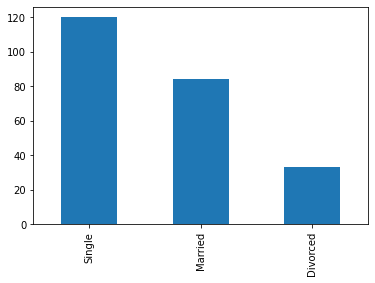

In [12]:
datAttritionYes.MaritalStatus.value_counts().plot.bar()

##### Seems like single people are more likely to quit their job, even though there are more married people in the overall dataset

In [13]:
# converting attrition and others to dummy variable
dat = pd.get_dummies(data = dat, columns = ["Attrition", "Department", "Gender",
                                            "BusinessTravel","OverTime", "JobRole","MaritalStatus"])



### Correlation

In [14]:
# looking at correlation of attrition with all other variables
corr = dat.corr()[['Attrition_Yes']]
corr.sort_values(by="Attrition_Yes")
# largest correlation with attrition_yes is total working years, job level, years in current role, overtime 

,Attrition_Yes
Attrition_No,-1.000000
OverTime_No,-0.246118
TotalWorkingYears,-0.171063
JobLevel,-0.169105
YearsInCurrentRole,-0.160545
MonthlyIncome,-0.159840
Age,-0.159205
YearsWithCurrManager,-0.156199
StockOptionLevel,-0.137145
YearsAtCompany,-0.134392


### Logistic Regression

In [16]:
# first going to use logisitc regression to predict the attrition rate
# redundant attributes seem like (Age & TotalWorkingYears, so I will only keep age
# education field and over 18 don't seem like they will be helpful, so I will exclude those

xData = dat.drop(["Attrition_Yes", "Attrition_No", "EducationField", "Over18", "TotalWorkingYears"],axis=1)
X = xData[list(xData.columns)]
Y = dat["Attrition_Yes"]

# splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [17]:
coef = model.coef_[0]
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_trainRefined = X_train[imp_features]
X_testRefined = X_test[imp_features]

In [18]:
print(sum(model.coef_[0]==0))
print("Redundant Features", list(pd.Series(X_train.columns)[list(coef==0)]))

12
Redundant Features ['EmployeeCount', 'JobLevel', 'Department_Human Resources', 'Department_Sales', 'Gender_Female', 'BusinessTravel_Travel_Rarely', 'OverTime_No', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Married']


In [19]:
model.fit(X_trainRefined, y_train)
model.score(X_testRefined, y_test, sample_weight=None)
# got accuracy score of 0.88

0.8868312757201646

### Overall, the model was gained an accuracy score of 0.886